In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
from math import pi
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
fifa_16 = pd.read_csv('cleaned_fifa_16.csv')
fifa_17 = pd.read_csv('cleaned_fifa_17.csv')
fifa_18 = pd.read_csv('cleaned_fifa_18.csv')
fifa_19 = pd.read_csv('cleaned_fifa_19.csv')
fifa_20 = pd.read_csv('cleaned_fifa_20.csv')

In [3]:
fifa_16 = fifa_16.assign(year=2016)
fifa_17 = fifa_17.assign(year=2017)
fifa_18 = fifa_18.assign(year=2018)
fifa_19 = fifa_19.assign(year=2019)
fifa_20 = fifa_20.assign(year=2020)

In [4]:
fifa_16 = fifa_16.drop(columns='Unnamed: 0')
fifa_17 = fifa_17.drop(columns='Unnamed: 0')
fifa_18 = fifa_18.drop(columns='Unnamed: 0')
fifa_19 = fifa_19.drop(columns='Unnamed: 0')
fifa_20 = fifa_20.drop(columns='Unnamed: 0')

In [5]:
# building a radar plot:
Messi = {'Pace':89,'Shooting':90,'Passing':86,'Dribbling':95,'Defending':26,'Physical':61}
Ronaldo = {'Pace':90,'Shooting':93,'Passing':82,'Dribbling':90,'Defending':33,'Physical':80}

In [6]:
radar_20 = fifa_20[['name', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
radar_20 = radar_20.set_index(['name'])
radar_20 = radar_20.dropna()
radar_20.head(2)

,pace,shooting,passing,dribbling,defending,physic
name,,,,,,
L. Messi,87.0,92.0,92.0,96.0,39.0,66.0
Cristiano Ronaldo,90.0,93.0,82.0,89.0,35.0,78.0


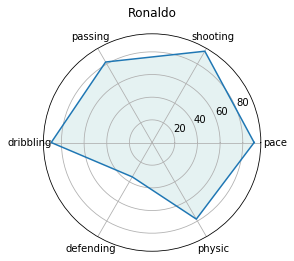

In [7]:
# make a list out of the columns' names and call it Attributes
Attributes =list(radar_20)
AttNo = len(Attributes)

# Rondaldo's values
values = radar_20.iloc[1].tolist()
values += values [:1]
values

# Radar plot angles:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,values)

#Fill in the area plotted in the last line
ax.fill(angles, values, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title('Ronaldo')
plt.show()

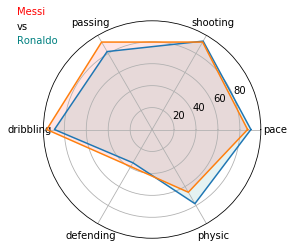

In [8]:
#Find the values and angles for Messi
values2 = radar_20.iloc[0].tolist()
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

#Create the chart as before, but with both Ronaldo's and Messi's angles/values
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1],Attributes)

ax.plot(angles,values)
ax.fill(angles, values, 'teal', alpha=0.1)

ax.plot(angles2,values2)
ax.fill(angles2, values2, 'red', alpha=0.1)

#Rather than use a title, individual text points are added
plt.figtext(0.2,0.9,'Messi',color='r')
plt.figtext(0.2,0.85,'vs')
plt.figtext(0.2,0.8,'Ronaldo',color='teal')
plt.show()

In [9]:
# Creating a function to plot individual players
def createRadar(df, player):
    Attributes =list(radar_20)
    AttNo = len(Attributes)
    
    data = df.loc[player, :].tolist()
    data += data [:1]
    
    angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)
    ax.plot(angles,data)
    ax.fill(angles, data, 'blue', alpha=0.1)

    ax.set_title(player)
    plt.show()

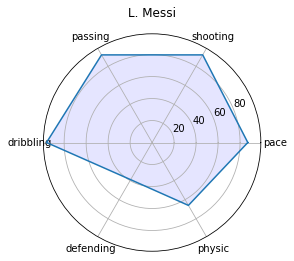

In [10]:
#Example:
createRadar(radar_20, 'L. Messi')

In [11]:
# Function to compare two players
def createRadar2(df1, player1, df2, player2):
    Attributes =list(radar_20)
    AttNo = len(Attributes)
    
    data = df1.loc[player1, :].tolist()
    data += data [:1]
    
    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles += angles [:1]
    
    data2 = df2.loc[player2, :].tolist()
    data2 += data2 [:1]
    
    angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles2 += angles2 [:1]
    
    ax = plt.subplot(111, polar=True)

    #Create the chart as before, but with both Ronaldo's and Messi's angles/values
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,data)
    ax.fill(angles, data, 'teal', alpha=0.1)

    ax.plot(angles2,data2)
    ax.fill(angles2, data2, 'red', alpha=0.1)

    #Rather than use a title, individual text points are added
    plt.figtext(0.2,0.9,player1,color='teal')
    plt.figtext(0.2,0.85,'vs')
    plt.figtext(0.2,0.8,player2,color='red')
    plt.show()

C:\Users\Seno\Miniconda3\envs\code_red\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


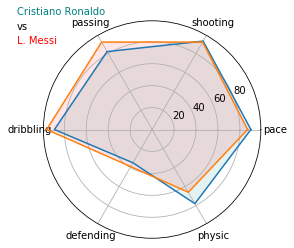

In [12]:
#example:
createRadar2(radar_20, 'Cristiano Ronaldo', radar_20,'L. Messi');

In [13]:
# Let's check the rating vs Value in millions distribuation
scatter_20 = fifa_20[['value_M', 'wage_K', 'rating', 'position']]
scatter_20.head()

,value_M,wage_K,rating,position
0,95.5,565.0,94,RM
1,58.5,405.0,93,ST
2,105.5,290.0,92,LM
3,77.5,125.0,91,GK
4,90.0,470.0,91,LM


In [14]:
# Let's check the rating vs wage distribuation
X = scatter_20['rating'].values.reshape(-1,1)
y = scatter_20['wage_K'].values.reshape(-1,1)
regr = linear_model.LinearRegression().fit(X, y)

y_pred = regr.predict(X)
print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))

Coefficients:  [[1.7621523]]
Mean squared error: 305.89
Variance score: 0.33


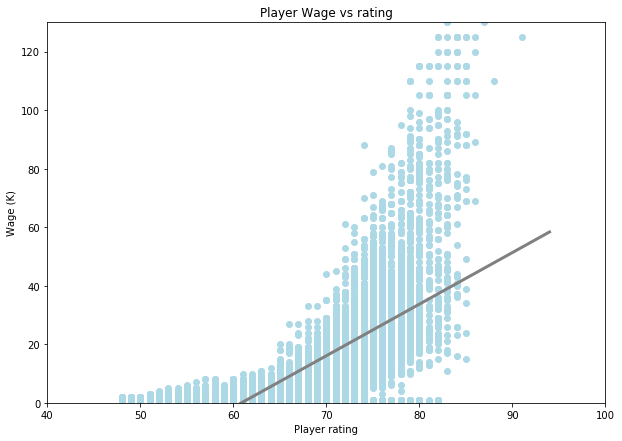

In [15]:
def plot_chart(X, y, y_pred, x_l, x_h, y_l, y_h, c):
    plt.figure(figsize = (10,7))
    plt.scatter(X, y, c =c)
    plt.plot(X, y_pred, c ='gray', linewidth=3)

    plt.title('Player Wage vs rating')
    plt.ylim(y_l,y_h)
    plt.xlim(x_l,x_h)
    plt.ylabel('Wage (K)')
    plt.xlabel('Player rating')
    
plot_chart(X, y, y_pred, 40, 100, 0, 130, 'lightblue')

Linear regression is not a good fit to the wage distribuation. Let's check for the Value of the players.

In [16]:
# Linear model for the rating's scatter
X = scatter_20['rating'].values.reshape(-1,1)
y = scatter_20['value_M'].values.reshape(-1,1)
regr = linear_model.LinearRegression().fit(X, y)

y_pred = regr.predict(X)
print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))

Coefficients:  [[0.51292719]]
Mean squared error: 18.49
Variance score: 0.41


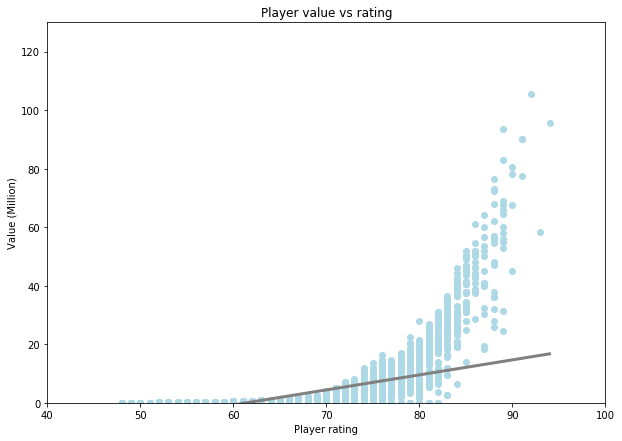

In [17]:
def plot_chart(X, y, y_pred, x_l, x_h, y_l, y_h, c):
    plt.figure(figsize = (10,7))
    plt.scatter(X, y, c =c)
    plt.plot(X, y_pred, c ='gray', linewidth=3)

    plt.title('Player value vs rating')
    plt.ylim(y_l,y_h)
    plt.xlim(x_l,x_h)
    plt.ylabel('Value (Million)')
    plt.xlabel('Player rating')
    
plot_chart(X, y, y_pred, 40, 100, 0, 130, 'lightblue')

In [18]:
y = fifa_20["value_M"].values.reshape(-1,1)

X = fifa_20["wage_K"].values.reshape(-1,1)

regr = linear_model.LinearRegression().fit(X,y)
y_pred = regr.predict(X)

print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))

Coefficients:  [[0.22446116]]
Mean squared error: 8.23
Variance score: 0.74


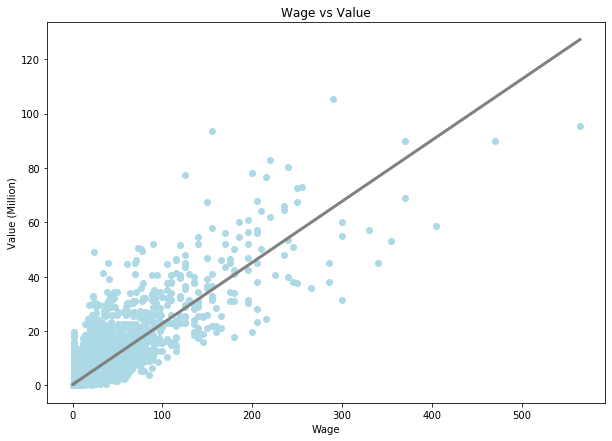

In [19]:
def plot_chart(X, y, y_pred, c):
    plt.figure(figsize = (10,7))
    plt.scatter(X, y, c =c)
    plt.plot(X, y_pred, c ='gray', linewidth=3)
    plt.title('Wage vs Value')
    plt.ylabel('Value (Million)')
    plt.xlabel('Wage')
plot_chart(X, y, y_pred,'lightblue')

We can clearly see that the higher the player's value, the higher his wage is.

Linear regression is not a good fit to the data.

In [20]:
fifa_20 = fifa_20.assign(const=1)

In [21]:
fifa_20.head()

,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right,year,const
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,95.5,565.0,Left,Yes,RM,10.0,87.0,92.0,92.0,96.0,39.0,66.0,70,94,96,91,84,1,0,2020,1
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,58.5,405.0,Right,Yes,ST,7.0,90.0,93.0,82.0,89.0,35.0,78.0,89,76,92,89,91,1,1,2020,1
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,105.5,290.0,Right,Yes,LM,10.0,91.0,85.0,87.0,95.0,32.0,58.0,62,87,95,94,89,1,1,2020,1
3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,77.5,125.0,Right,Yes,GK,13.0,NaN,NaN,NaN,NaN,NaN,NaN,15,14,30,43,60,1,1,2020,1
4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,90.0,470.0,Right,Yes,LM,7.0,91.0,83.0,86.0,94.0,35.0,66.0,61,79,94,94,88,1,1,2020,1


In [22]:
# logisitic regression for preferred foot Vs value in millions
X = fifa_20[['const'] + ['value_M']]
y = fifa_20['preferred_foot_Right']
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.546630
         Iterations 5


In [23]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     preferred_foot_Right   No. Observations:                18278
Model:                            Logit   Df Residuals:                    18276
Method:                             MLE   Df Model:                            1
Date:                  Fri, 14 Feb 2020   Pseudo R-squ.:               0.0001407
Time:                          17:07:38   Log-Likelihood:                -9991.3
converged:                         True   LL-Null:                       -9992.7
Covariance Type:              nonrobust   LLR p-value:                   0.09362
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1862      0.019     62.357      0.000       1.149       1.223
value_M       -0.0051      0.003     -1.700      0.089      -0.011       0.001
==============================================================================
"""

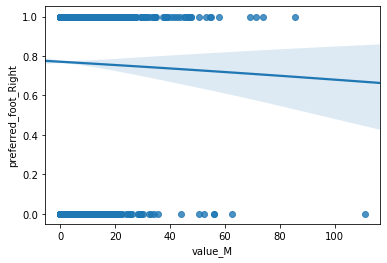

In [24]:
#using statsmodel:
sns.regplot(x='value_M', y='preferred_foot_Right', data=fifa_16, logistic=True);

There is no clear relationship between the player's value and his preffered foot.

In [25]:
fifa_20["real_face"].value_counts()

No     16310
Yes     1968
Name: real_face, dtype: int64

In [26]:
X = fifa_20[['const'] + ['value_M']]
y = fifa_20['real_face_Yes']
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.263421
         Iterations 7


In [27]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          real_face_Yes   No. Observations:                18278
Model:                          Logit   Df Residuals:                    18276
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Feb 2020   Pseudo R-squ.:                  0.2289
Time:                        17:08:04   Log-Likelihood:                -4814.8
converged:                       True   LL-Null:                       -6244.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0045      0.036    -83.196      0.000      -3.075      -2.934
value_M        0.2441      0.006     41.261      0.000       0.233       0.256
==============================================================================
"""

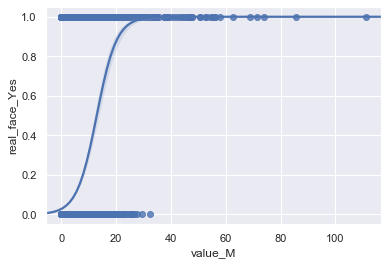

In [79]:
sns.regplot(x="value_M", y="real_face_Yes", data=fifa_16, logistic=True);

Fun fact: the higher your value is, the more likely you get your rendered rendered face.

In [29]:
#using SKlearn:
y = fifa_20["value_M"].values.reshape(-1,1)

X = fifa_20["preferred_foot_Right"].values.reshape(-1,1)

regr = linear_model.LinearRegression().fit(X,y)
y_pred = regr.predict(X)

print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))

Coefficients:  [[-0.16562451]]
Mean squared error: 31.19
Variance score: 0.00


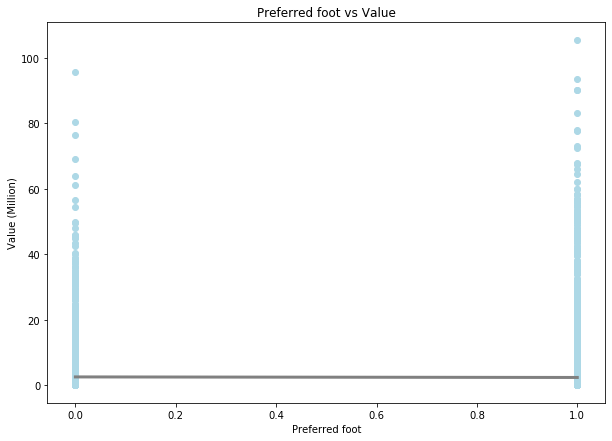

In [30]:
def plot_chart(X, y, y_pred, c):
    plt.figure(figsize = (10,7))
    plt.scatter(X, y, c =c)
    plt.plot(X, y_pred, c ='gray', linewidth=3)
    plt.title('Preferred foot vs Value')
    plt.ylabel('Value (Million)')
    plt.xlabel('Preferred foot')
plot_chart(X, y, y_pred,'lightblue')

Wrong axes :P

In [31]:
y = fifa_20["preferred_foot_Right"].values.reshape(-1,1)

X = fifa_20["value_M"].values.reshape(-1,1)

regr = linear_model.LinearRegression().fit(X,y)
y_pred = regr.predict(X)

print('Coefficients: ', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Variance score: %.2f'% r2_score(y, y_pred))

Coefficients:  [[-0.00095794]]
Mean squared error: 0.18
Variance score: 0.00


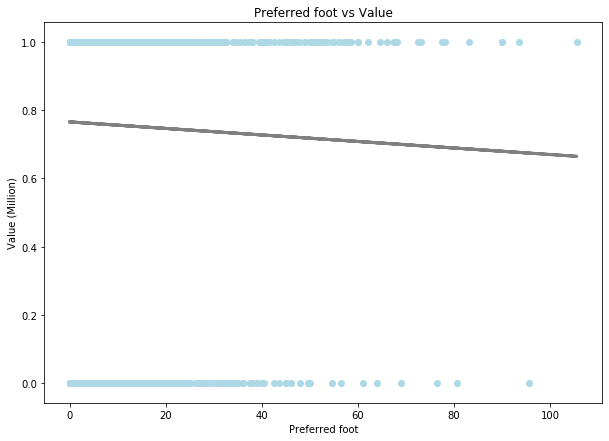

In [32]:
def plot_chart(X, y, y_pred, c):
    plt.figure(figsize = (10,7))
    plt.scatter(X, y, c =c)
    plt.plot(X, y_pred, c ='gray', linewidth=3)
    plt.title('Preferred foot vs Value')
    plt.ylabel('Value (Million)')
    plt.xlabel('Preferred foot')
plot_chart(X, y, y_pred,'lightblue')

not useful

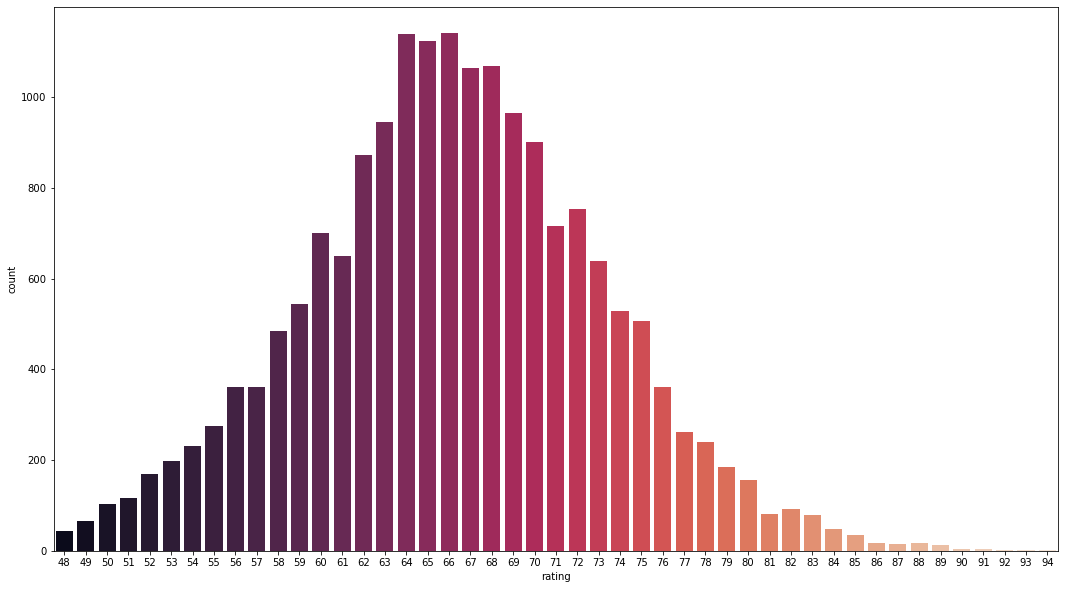

In [33]:
#The Overall Rating
plt.figure(figsize=(18,10))
sns.countplot(fifa_20['rating'], palette='rocket')
plt.show();

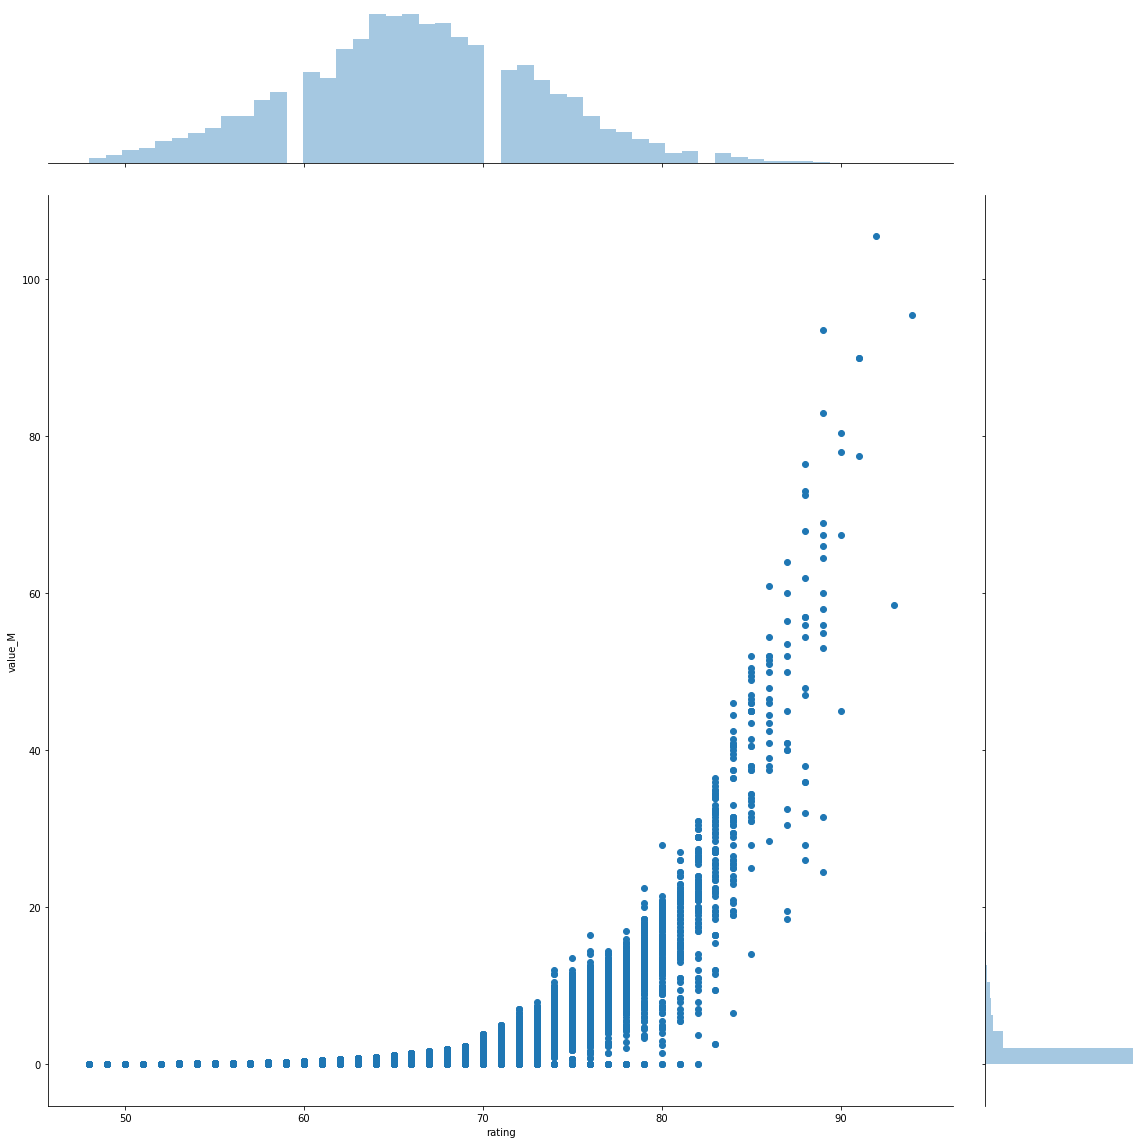

In [34]:
# Rating Vs Value
sns.jointplot(x=fifa_20['rating'], y=fifa_20['value_M'], data=fifa_20, height=16);

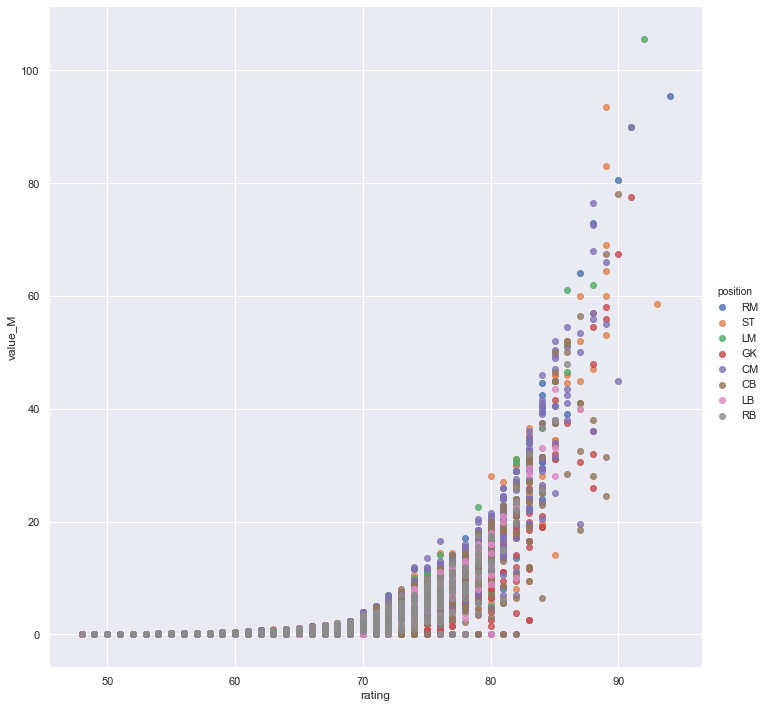

In [81]:
# Rating Vs Value colored by position
position_vs_value_dist = sns.lmplot( x="rating", y="value_M", data=fifa_20, fit_reg=False, hue='position', legend=True, height=10);
position_vs_value_dist.savefig('position_vs_value_dist.png', dpi=400)

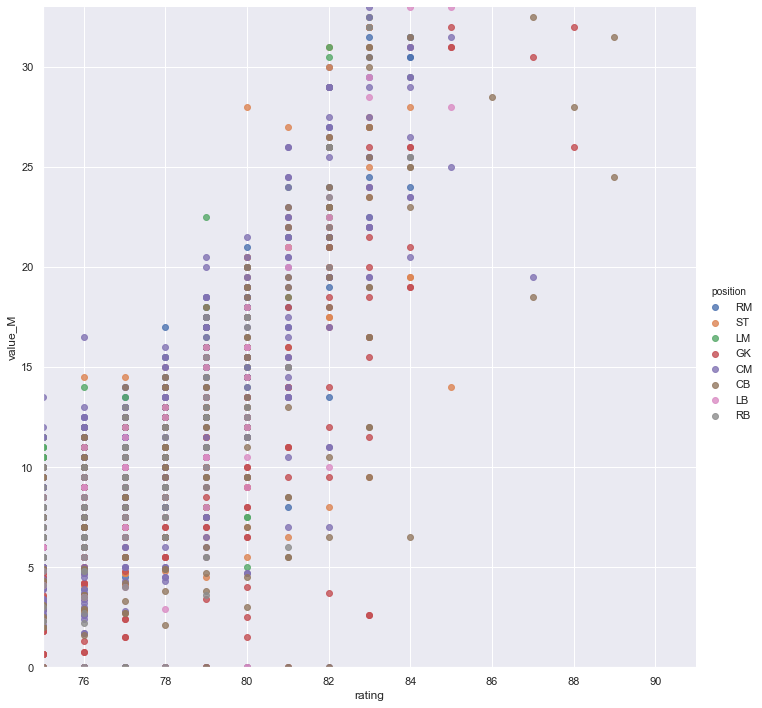

In [80]:
# We set the limits for our dream team on budget
conditions = sns.lmplot( x="rating", y="value_M", data=fifa_20, fit_reg=False, hue='position', legend=True, height=10);
plt.ylim(0,33);
plt.xlim(75,91);
conditions.savefig('conditions.png', dpi=400)

In [37]:
# top five free kickers
fifa_20.sort_values(by = 'free_kick' , ascending = False)[['name','club','nationality','rating', 'age','free_kick']].head()

,name,club,nationality,rating,age,free_kick
0,L. Messi,FC Barcelona,Argentina,94,32,94
393,S. Giovinco,Al Hilal,Italy,81,32,92
65,M. Pjanić,Juventus,Bosnia Herzegovina,86,29,92
1612,A. Zamorado,Ecuador,Ecuador,76,38,91
779,E. Bardhi,Levante UD,FYR Macedonia,78,23,91


In [38]:
#Age Distribution
clubs = ['Chelsea' , 'Arsenal', 'Liverpool', 'Manchester City', 'Manchester United', 
         'Juventus', 'Roma', 'Napoli', 'Inter', 'Milan', 
         'Paris Sain-Germain' ,
         'FC Bayern München', 'Borussia Dortmund', 
         'Real Madrid' , 'FC Barcelona' , 'Atlético Madrid']

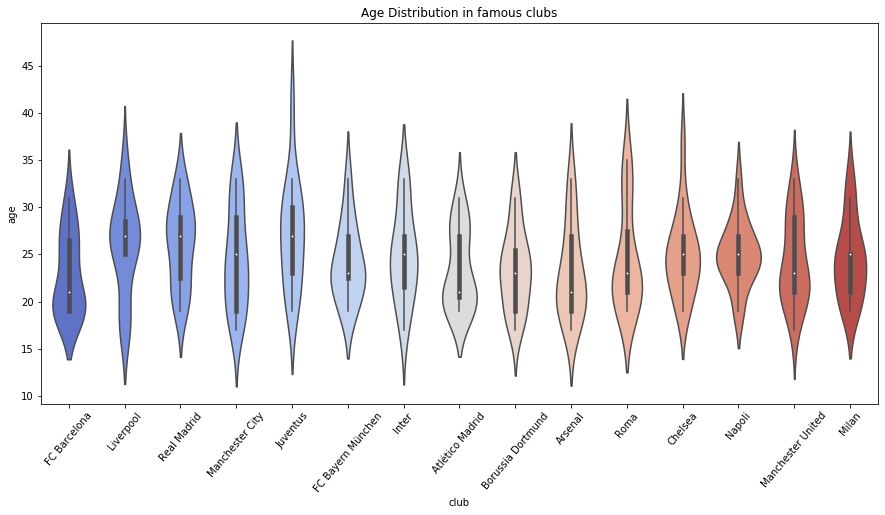

In [39]:
fifa_club_age = fifa_20.loc[fifa_20['club'].isin(clubs) & fifa_20['age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'club' , y = 'age' , data = fifa_club_age,palette='coolwarm')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show();

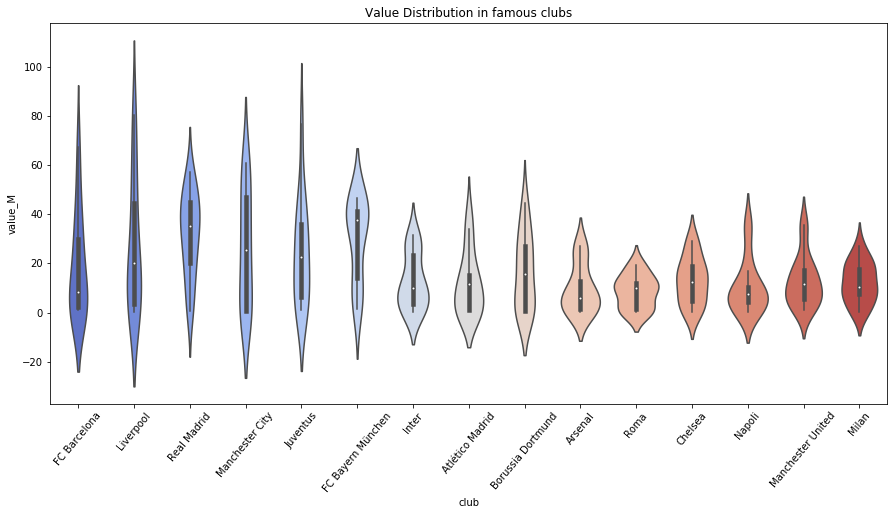

In [40]:
fifa_club_age = fifa_20.loc[fifa_20['club'].isin(clubs) & fifa_20['age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'club' , y = 'value_M' , data = fifa_club_age,palette='coolwarm')
plt.title('Value Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

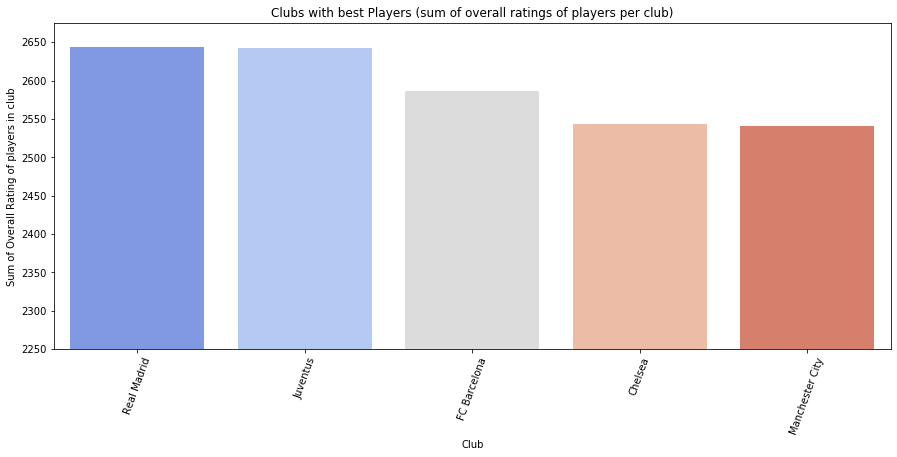

In [41]:
#The Best Club
best_dict = {}
for club in fifa_20['club'].unique():
    overall_rating = fifa_20['rating'][fifa_20['club'] == club].sum()
    best_dict[club] = overall_rating
best_club = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['rating'])
best_club['club'] = best_club.index
best_club = best_club.sort_values(by = 'rating' , ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x = 'club' , y  = 'rating' , data = best_club.head(5),palette='coolwarm')  
plt.xticks(rotation = 70)
plt.xlabel('Club')
plt.ylabel('Sum of Overall Rating of players in club')
plt.title('Clubs with best Players (sum of overall ratings of players per club)')
plt.ylim(2250 , 2675)
plt.show()

In [42]:
countries = ['England' , 'Brazil' , 'Portugal' ,'Argentina',
             'Italy' , 'Spain' , 'Germany' ,'Netherlands','France']

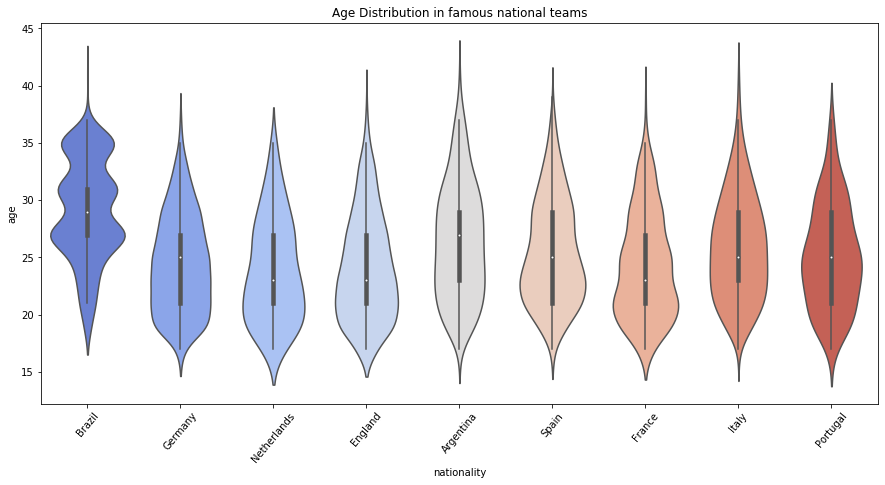

In [43]:
#Age Distribution
fifa_country_age = fifa_20.loc[fifa_20['nationality'].isin(countries) & fifa_20['age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'nationality' , y = 'age' , data = fifa_country_age, palette='coolwarm')
plt.title('Age Distribution in famous national teams')
plt.xticks(rotation = 50)
plt.show()

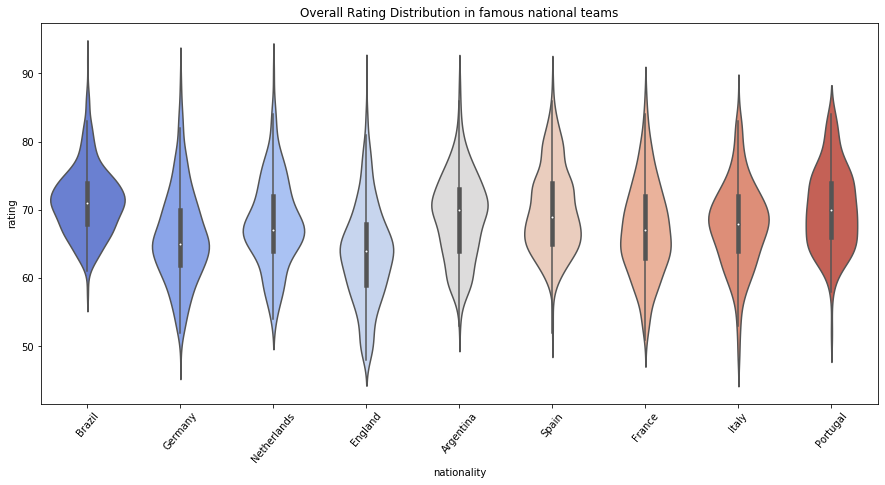

In [44]:
#Overall Rating
fifa_country_rating = fifa_20.loc[fifa_20['nationality'].isin(countries) & fifa_20['rating']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'nationality' , y = 'rating' , data = fifa_country_age, palette='coolwarm')
plt.title('Overall Rating Distribution in famous national teams')
plt.xticks(rotation = 50)
plt.show();

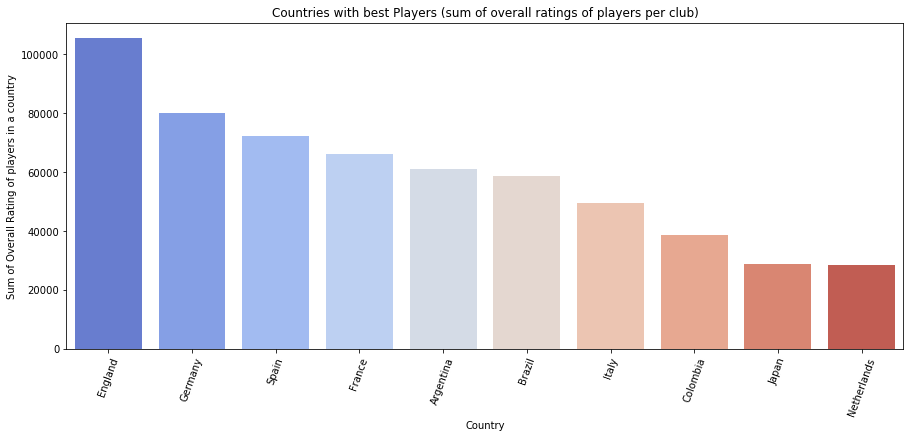

In [45]:
#The Best Country
best_dict = {}
for country in fifa_20['nationality'].unique():
    overall_rating = fifa_20['rating'][fifa_20['nationality'] == country].sum()
    best_dict[country] = overall_rating
best_country = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['overall'])
best_country['club'] = best_country.index
best_country = best_country.sort_values(by = 'overall' , ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x = 'club' , y  = 'overall' , data = best_country.head(10),palette='coolwarm')  
plt.xticks(rotation = 70)
plt.xlabel('Country')
plt.ylabel('Sum of Overall Rating of players in a country')
plt.title('Countries with best Players (sum of overall ratings of players per club)')
plt.show()


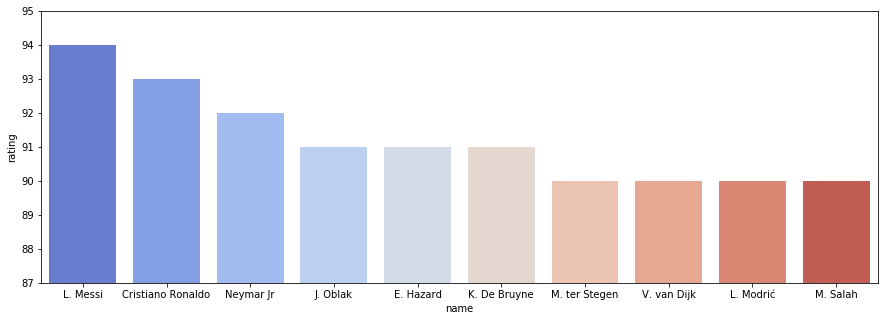

In [46]:
#The Top 10 Players
fifa_best_players = pd.DataFrame.copy(fifa_20.sort_values(by = 'rating' , ascending = False ).head(10))

plt.figure(1 , figsize = (15 , 5))
sns.barplot(x ='name' , y = 'rating' , data = fifa_best_players,palette='coolwarm')

plt.ylim(87 , 95)
plt.show()

In [47]:
# top 5 paid Salaries
fifa_20.sort_values(by = 'wage_K' , ascending = False)[['name','club','nationality','rating',
'age','wage_K']].head()

,name,club,nationality,rating,age,wage_K
0,L. Messi,FC Barcelona,Argentina,94,32,565.0
4,E. Hazard,Real Madrid,Belgium,91,28,470.0
1,Cristiano Ronaldo,Juventus,Portugal,93,34,405.0
5,K. De Bruyne,Manchester City,Belgium,91,28,370.0
22,A. Griezmann,FC Barcelona,France,89,28,370.0


In [48]:
dfs = (fifa_16,fifa_17,fifa_18,fifa_19,fifa_20)

In [49]:
df = pd.concat(dfs, axis=0, ignore_index=True)

C:\Users\Seno\Miniconda3\envs\code_red\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [50]:
# taking a look at some famous players through out the different fifa versions
#Messi
df_messi = df[df.name.eq('L. Messi')]
#Ronaldo
df_ronaldo = df[df.name.eq('Cristiano Ronaldo')]
#Mbappee
df_mbappe = df[df.id.eq(231747)]
# morata
df_morata = df[df.id.eq(201153)] 
#neymar
df_neymar = df[df.id.eq(190871)] 
#salah
df_salah = df[df.id.eq(209331)] 

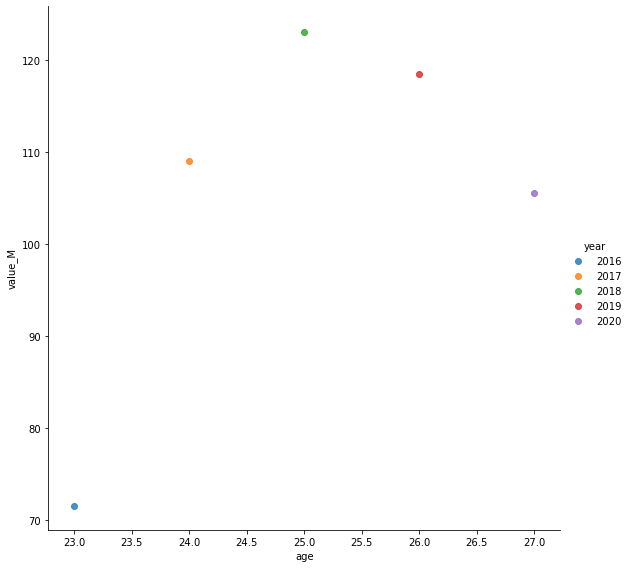

In [51]:
sns.lmplot( x='age', y='value_M', data=df_neymar, fit_reg=False, hue='year', legend=True, height=8);

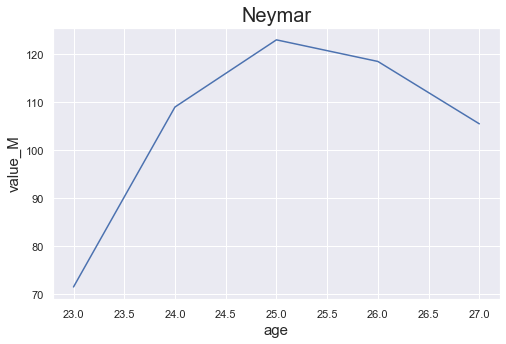

In [52]:
plt.figure(figsize = (8,5))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = 'age', y = 'value_M', data = df_neymar,
             palette = 'hot', dashes = False, 
            markers = ['o', '<', '>', '^'],  legend='brief',)
 
plt.title('Neymar', fontsize = 20)
plt.xlabel('age', fontsize = 15)
plt.ylabel('value_M', fontsize = 15)
plt.show()

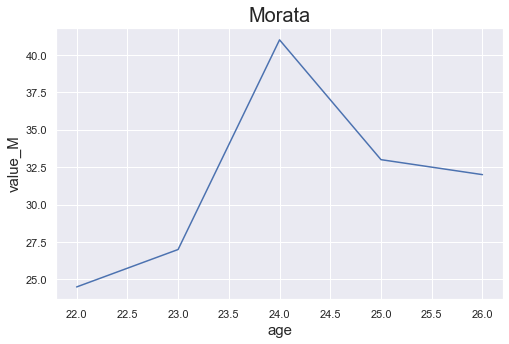

In [53]:
plt.figure(figsize = (8,5))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = 'age', y = 'value_M', data = df_morata,
             palette = 'hot', dashes = False, 
            markers = ['o', '<', '>', '^'],  legend='brief',)
 
plt.title('Morata', fontsize = 20)
plt.xlabel('age', fontsize = 15)
plt.ylabel('value_M', fontsize = 15)
plt.show()

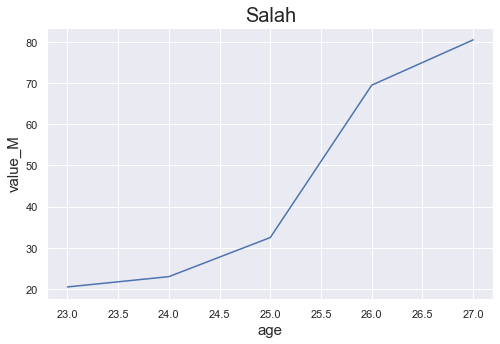

In [54]:
plt.figure(figsize = (8,5))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = 'age', y = 'value_M', data = df_salah,
             palette = 'hot', dashes = False, 
            markers = ['o', '<', '>', '^'],  legend='brief',)
 
plt.title('Salah', fontsize = 20)
plt.xlabel('age', fontsize = 15)
plt.ylabel('value_M', fontsize = 15)
plt.show()

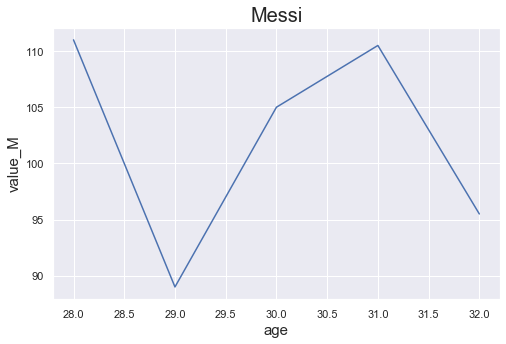

In [55]:
plt.figure(figsize = (8,5))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = 'age', y = 'value_M', data = df_messi,
             palette = 'hot', dashes = False, 
            markers = ['o', '<', '>', '^'],  legend='brief',)
 
plt.title('Messi', fontsize = 20)
plt.xlabel('age', fontsize = 15)
plt.ylabel('value_M', fontsize = 15)
plt.show()

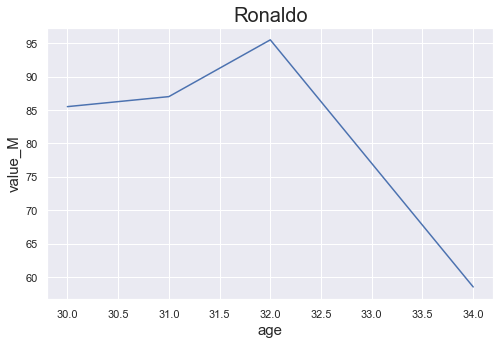

In [56]:
plt.figure(figsize = (8,5))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = 'age', y = 'value_M', data = df_ronaldo,
             palette = 'hot', dashes = False, 
            markers = ['o', '<', '>', '^'],  legend='brief',)
 
plt.title('Ronaldo', fontsize = 20)
plt.xlabel('age', fontsize = 15)
plt.ylabel('value_M', fontsize = 15)
plt.show()

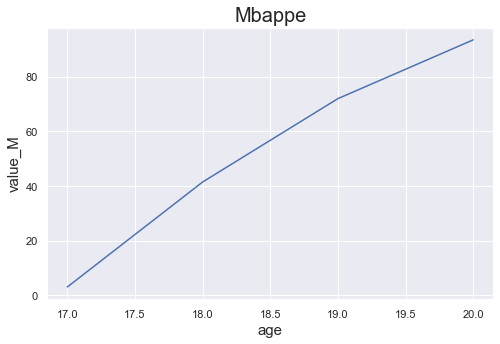

In [57]:
plt.figure(figsize = (8,5))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = 'age', y = 'value_M', data = df_mbappe,
             palette = 'hot', dashes = False, 
            markers = ['o', '<', '>', '^'],  legend='brief',)
 
plt.title('Mbappe', fontsize = 20)
plt.xlabel('age', fontsize = 15)
plt.ylabel('value_M', fontsize = 15)
plt.show()

In [58]:
dfs = [df_neymar,df_messi,df_ronaldo,df_mbappe,df_salah,df_morata]

names = pd.concat(dfs, axis=0, ignore_index=True)
names['name'] = names['name'].str.replace('Neymar Jr','Neymar')
names['name'] = names['name'].str.replace('K. Mbappe Lottin','K. Mbappé')

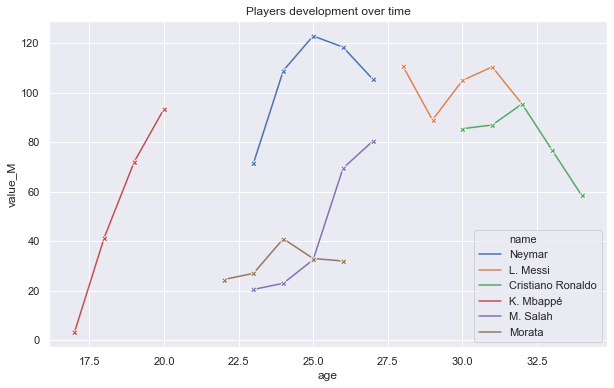

In [59]:
plt.figure(figsize=(10, 6))

g = sns.lineplot(x='age',
                 y='value_M',
                 hue='name',
                 marker='X',
                 data=names
                 ).set_title('Players development over time')
plt.show()

In [60]:
#taking a look at a money spendng club through out the different fifa versions
df_p = df[df.club.eq('Paris Saint-Germain')]

In [61]:
df_p.head()

,acceleration,age,ball_control,club,const,defending,dribbling,free_kick,heading,height,id,jersey_number,name,nationality,pace,passing,physic,position,preferred_foot,preferred_foot_Right,rating,real_face,real_face_Yes,shooting,speed,value_M,wage_K,weight,year
6,72,33,90,Paris Saint-Germain,NaN,31.0,85.0,80,76,195,41236,10.0,Z. Ibrahimović,Sweden,73.0,81.0,86.0,ST,Right,1,89,Yes,1,90.0,74,40.5,220.0,95,2016
8,72,30,80,Paris Saint-Germain,NaN,90.0,73.0,73,82,183,164240,2.0,Thiago Silva,Brazil,74.0,73.0,79.0,CB,Right,1,88,Yes,1,57.0,76,38.0,200.0,79,2016
47,74,28,83,Paris Saint-Germain,NaN,42.0,81.0,77,86,184,179813,9.0,E. Cavani,Uruguay,76.0,71.0,80.0,ST,Right,1,85,Yes,1,83.0,78,33.5,200.0,71,2016
49,88,27,86,Paris Saint-Germain,NaN,49.0,86.0,72,53,180,183898,11.0,A. Di María,Argentina,88.0,83.0,70.0,CM,Left,0,85,Yes,1,79.0,88,34.0,200.0,75,2016
51,72,22,85,Paris Saint-Germain,NaN,78.0,87.0,64,55,165,199556,6.0,M. Verratti,Italy,68.0,83.0,69.0,CM,Right,1,84,Yes,1,58.0,64,38.0,140.0,60,2016


In [62]:
p16 = fifa_16[fifa_16.club.eq('Paris Saint-Germain')].reset_index(drop=True)[0:11]

In [63]:
p17 = fifa_17[fifa_17.club.eq('Paris Saint-Germain')].reset_index(drop=True)[0:11]

In [64]:
p18 = fifa_18[fifa_18.club.eq('Paris Saint-Germain')].reset_index(drop=True)[0:11]

In [65]:
p19 = fifa_19[fifa_19.club.eq('Paris Saint-Germain')].reset_index(drop=True)[0:11]

In [66]:
p20 = fifa_20[fifa_20.club.eq('Paris Saint-Germain')].reset_index(drop=True)[0:11]

In [67]:
dfs = [p16,p17,p18,p19,p20]

In [68]:
paris = pd.concat(dfs, axis=0, ignore_index=True)

C:\Users\Seno\Miniconda3\envs\code_red\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [69]:
paris.head()

,acceleration,age,ball_control,club,const,defending,dribbling,free_kick,heading,height,id,jersey_number,name,nationality,pace,passing,physic,position,preferred_foot,preferred_foot_Right,rating,real_face,real_face_Yes,shooting,speed,value_M,wage_K,weight,year
0,72,33,90,Paris Saint-Germain,NaN,31.0,85.0,80,76,195,41236,10.0,Z. Ibrahimović,Sweden,73.0,81.0,86.0,ST,Right,1,89,Yes,1,90.0,74,40.5,220.0,95,2016
1,72,30,80,Paris Saint-Germain,NaN,90.0,73.0,73,82,183,164240,2.0,Thiago Silva,Brazil,74.0,73.0,79.0,CB,Right,1,88,Yes,1,57.0,76,38.0,200.0,79,2016
2,74,28,83,Paris Saint-Germain,NaN,42.0,81.0,77,86,184,179813,9.0,E. Cavani,Uruguay,76.0,71.0,80.0,ST,Right,1,85,Yes,1,83.0,78,33.5,200.0,71,2016
3,88,27,86,Paris Saint-Germain,NaN,49.0,86.0,72,53,180,183898,11.0,A. Di María,Argentina,88.0,83.0,70.0,CM,Left,0,85,Yes,1,79.0,88,34.0,200.0,75,2016
4,72,22,85,Paris Saint-Germain,NaN,78.0,87.0,64,55,165,199556,6.0,M. Verratti,Italy,68.0,83.0,69.0,CM,Right,1,84,Yes,1,58.0,64,38.0,140.0,60,2016


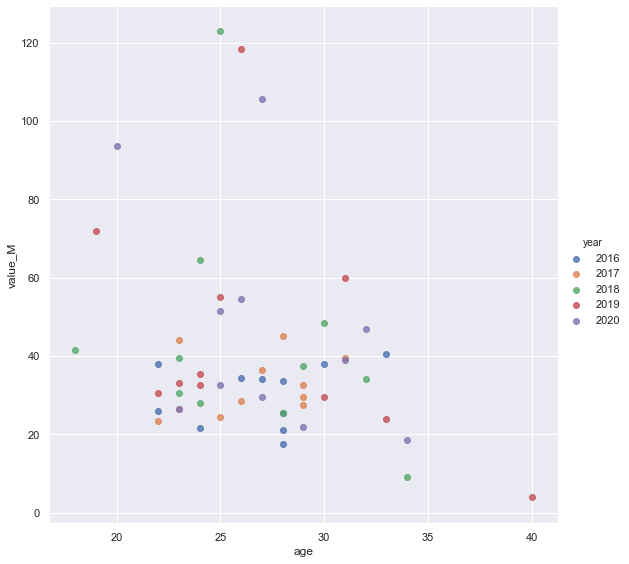

In [70]:
sns.lmplot( x='age', y='value_M', data=paris, fit_reg=False, hue='year', legend=True, height=8);


In [71]:
# let's start building our dream team on budget:
fifa_20_young = fifa_20.loc[fifa_20['age'] < 26] 

In [72]:
fifa_20_young = fifa_20_young.loc[fifa_20_young['value_M'] <= 30.00]

In [73]:
fifa_20_young = fifa_20_young[fifa_20_young['rating'].between( 80, 91)] 

In [74]:
fifa_20_young.head()

,id,name,age,height,weight,nationality,club,rating,value_M,wage_K,preferred_foot,real_face,position,jersey_number,pace,shooting,passing,dribbling,defending,physic,heading,free_kick,ball_control,acceleration,speed,real_face_Yes,preferred_foot_Right,year,const
167,221087,Pau López,24,189,77,Spain,Roma,83,26.0,38.0,Left,Yes,GK,12.0,NaN,NaN,NaN,NaN,NaN,NaN,15,21,16,45,52,1,0,2020,1
172,203574,J. Stones,25,188,70,England,Manchester City,83,30.0,140.0,Right,Yes,CB,5.0,68.0,36.0,70.0,72.0,84.0,77.0,83,29,80,65,71,1,1,2020,1
174,210035,Grimaldo,23,171,69,Spain,SL Benfica,83,29.5,18.0,Left,No,LB,3.0,85.0,63.0,79.0,84.0,77.0,71.0,65,81,83,86,84,0,0,2020,1
179,200458,L. Digne,25,178,74,France,Everton,83,28.5,97.0,Left,Yes,LB,12.0,78.0,69.0,79.0,79.0,80.0,76.0,71,83,83,79,78,1,0,2020,1
181,204935,J. Pickford,25,185,77,England,Everton,83,24.0,78.0,Left,Yes,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,15,16,40,53,44,1,0,2020,1


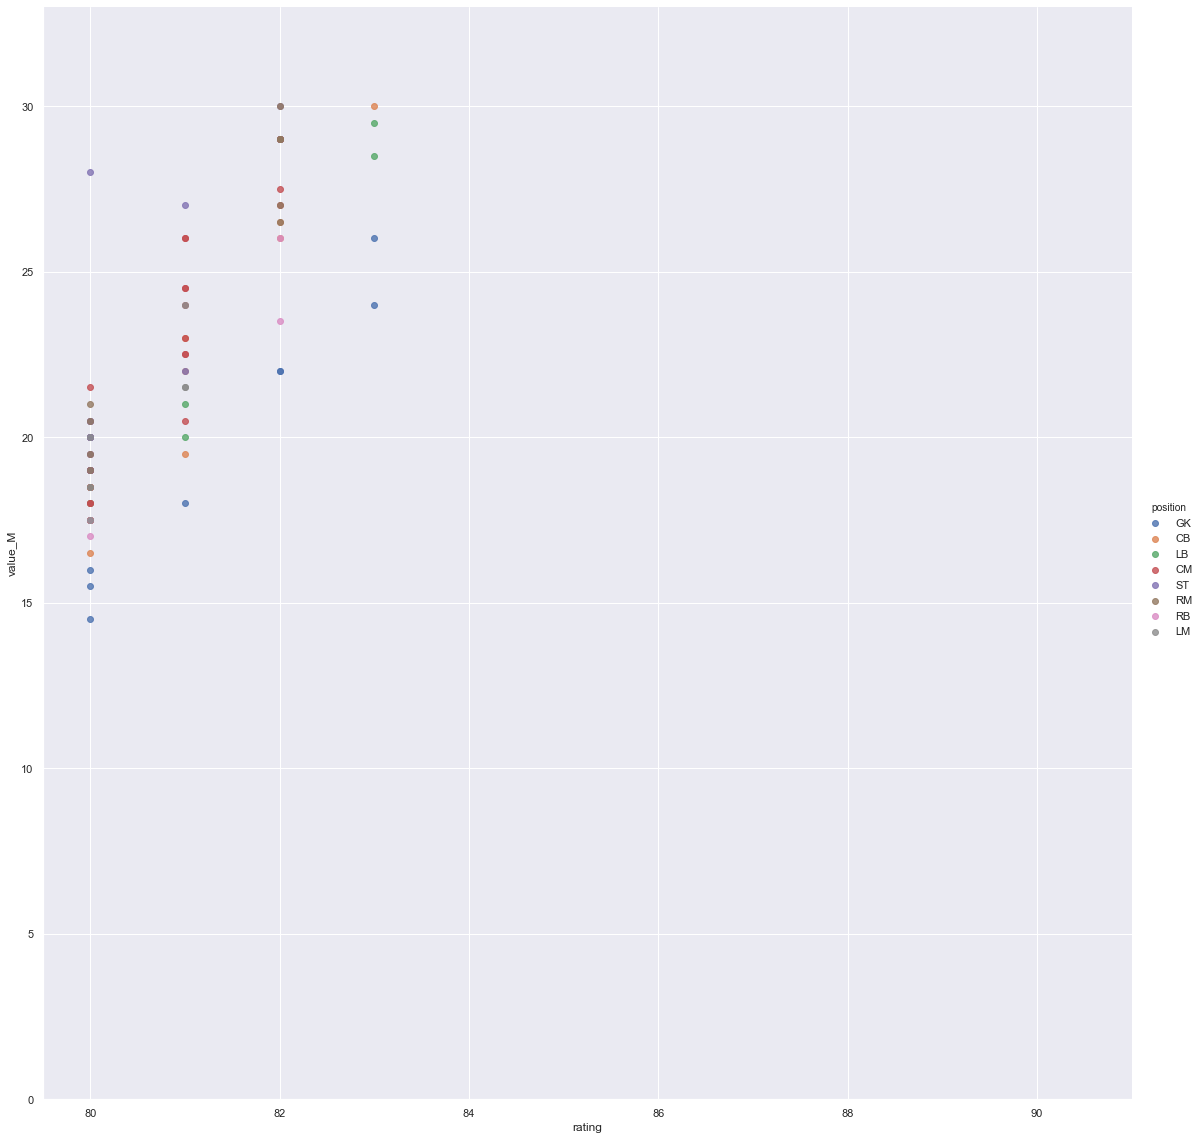

In [75]:
dream_team = sns.lmplot( x="rating", y="value_M", data=fifa_20_young, fit_reg=False, hue='position', legend=True, height=16);
plt.ylim(0,33);
plt.xlim(79.5,91);
dream_team.savefig('dream_team.png', dpi=400)

In [76]:
fifa_20_young.to_csv("fifa_20_young.csv")

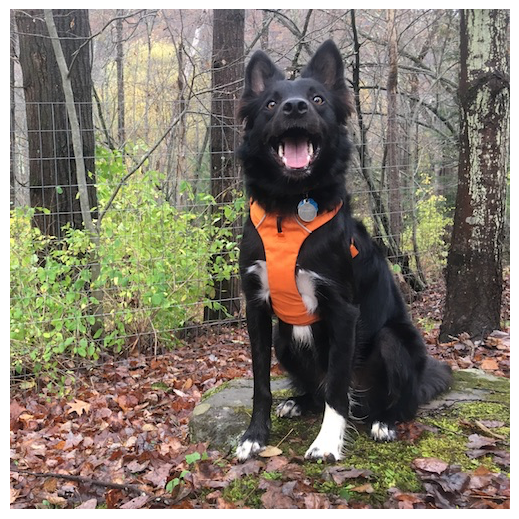

In [77]:
sns.dogplot()